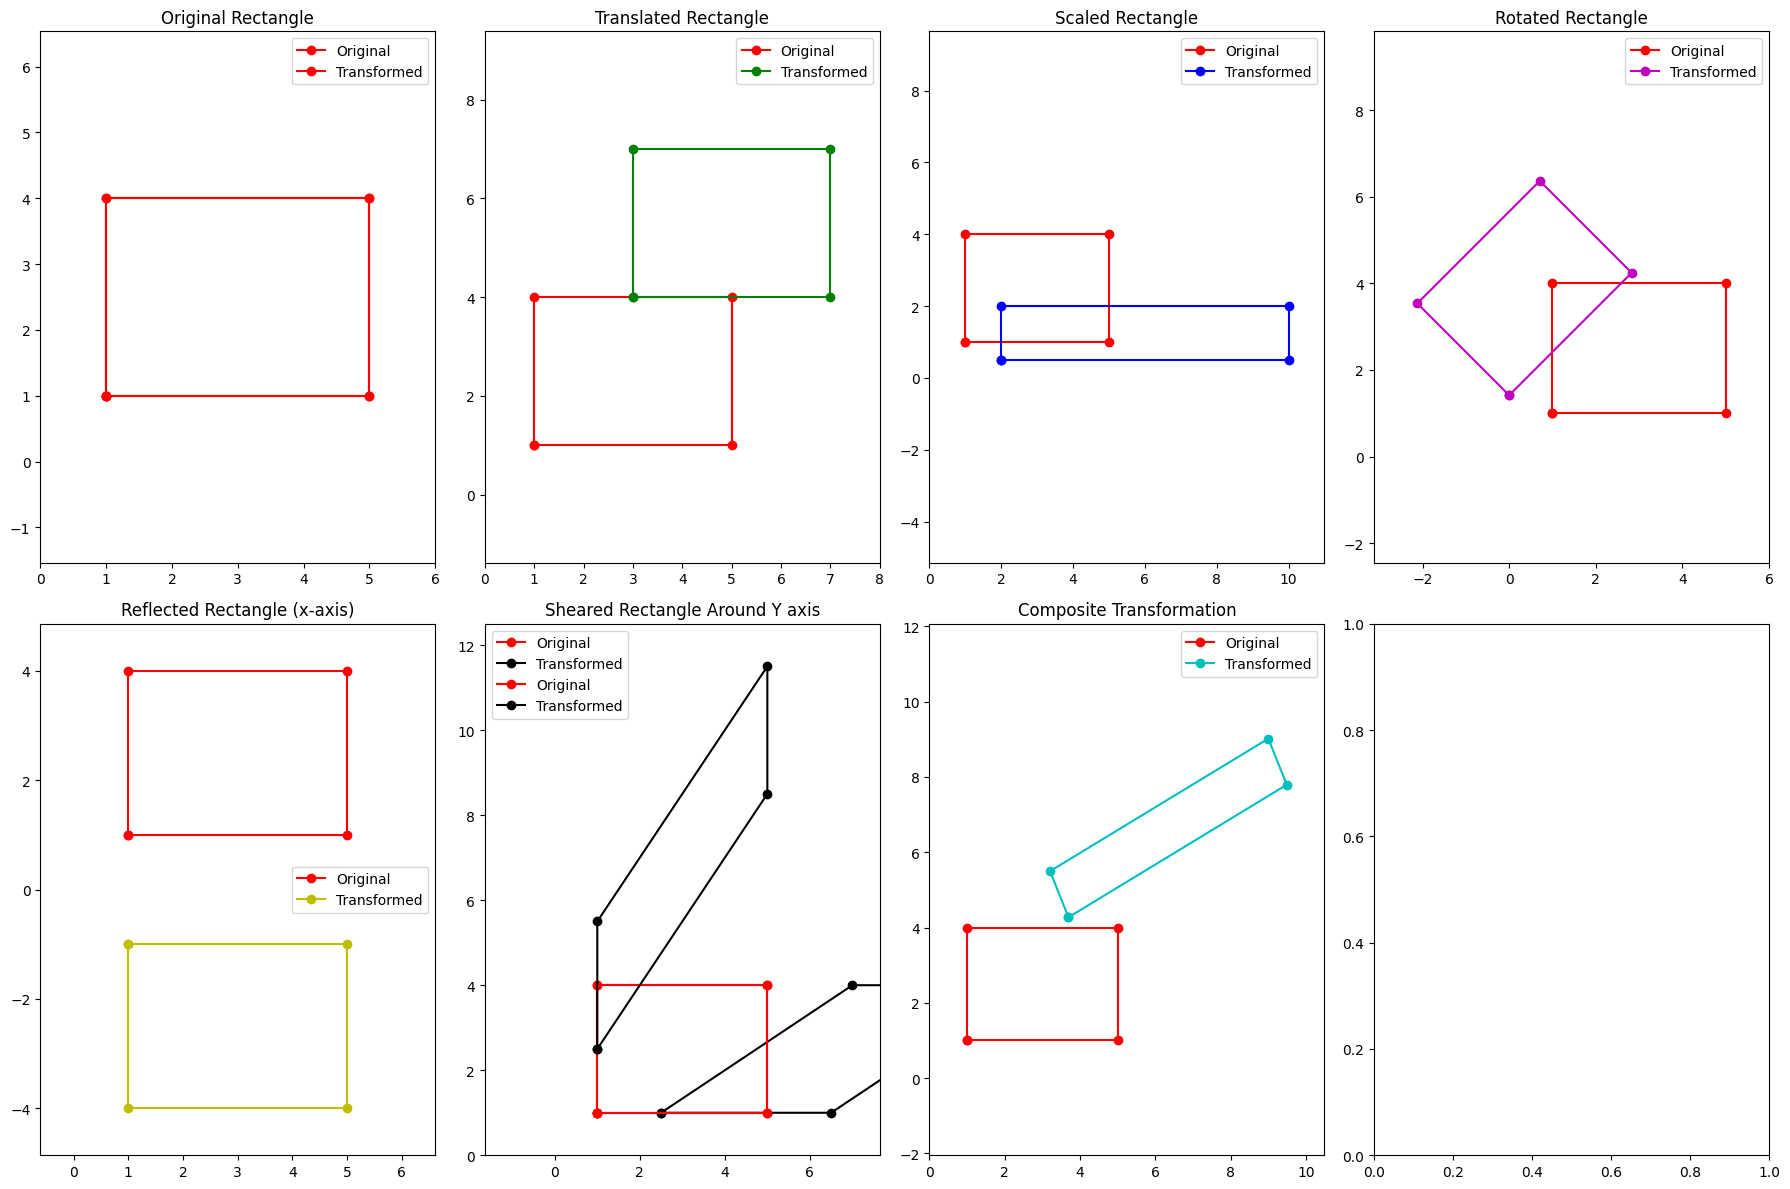

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original rectangle points
rectangle = np.array([[1, 1], [1, 4], [5, 4], [5, 1], [1, 1]])

def plot_shapes(original, transformed, ax, transform_style='bo-', original_style='ro-', title='Figure'):
    # Plot the original shape
    ax.plot(original[:, 0], original[:, 1], original_style, label='Original')
    # Plot the transformed shape
    ax.plot(transformed[:, 0], transformed[:, 1], transform_style, label='Transformed')
    ax.set_title(title)
    ax.axis('equal')

    # Automatically adjust the axis limits
    combined = np.vstack((original, transformed))
    buffer = 1  # Additional space around the shapes
    x_min, y_min = combined.min(axis=0) - buffer
    x_max, y_max = combined.max(axis=0) + buffer
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.legend()

def translate(shape, tx, ty):
    # Translation matrix
    T = np.array([[1, 0, tx],
                  [0, 1, ty],
                  [0, 0, 1]])
    # Apply the transformation
    return np.dot(T, np.vstack((shape.T, np.ones(shape.shape[0]))))[:2].T

def scale(shape, sx, sy):
    # Scaling matrix
    S = np.array([[sx, 0, 0],
                  [0, sy, 0],
                  [0, 0, 1]])
    # Apply the transformation
    return np.dot(S, np.vstack((shape.T, np.ones(shape.shape[0]))))[:2].T

def rotate(shape, theta):
    # Convert theta from degrees to radians
    theta = np.radians(theta)
    # Rotation matrix
    R = np.array([[np.cos(theta), -np.sin(theta), 0],
                  [np.sin(theta), np.cos(theta), 0],
                  [0, 0, 1]])
    # Apply the transformation
    return np.dot(R, np.vstack((shape.T, np.ones(shape.shape[0]))))[:2].T

def reflect(shape, axis):
    if axis == 'x':
        M = np.array([[1, 0, 0],
                      [0, -1, 0],
                      [0, 0, 1]])
    elif axis == 'y':
        M = np.array([[-1, 0, 0],
                      [0, 1, 0],
                      [0, 0, 1]])
    return np.dot(M, np.vstack((shape.T, np.ones(shape.shape[0]))))[:2].T

def shear(shape, shx, shy):
    # Shearing matrix
    Sh = np.array([[1, shx, 0],
                   [shy, 1, 0],
                   [0, 0, 1]])
    # Apply the transformation
    return np.dot(Sh, np.vstack((shape.T, np.ones(shape.shape[0]))))[:2].T

def composite_transform(shape):
    # Apply a combination of transformations
    T = translate(shape, 2, 3)
    S = scale(T, 1.5, 0.5)
    R = rotate(S, 30)
    Sh = shear(R, 0.2, 0.1)
    return Sh

# Plotting
fig, ax = plt.subplots(2, 4, figsize=(18, 12))
ax = ax.ravel()

# Original Shape
plot_shapes(rectangle, rectangle, ax[0], original_style='ro-', transform_style='ro-', title='Original Rectangle')

# Translation
translated = translate(rectangle, 2, 3)
plot_shapes(rectangle, translated, ax[1], transform_style='go-', title='Translated Rectangle')

# Scaling
scaled = scale(rectangle, 2, 0.5)
plot_shapes(rectangle, scaled, ax[2], transform_style='bo-', title='Scaled Rectangle')

# Rotation
rotated = rotate(rectangle, 45)
plot_shapes(rectangle, rotated, ax[3], transform_style='mo-', title='Rotated Rectangle')

# Reflection
reflected = reflect(rectangle, 'x')
plot_shapes(rectangle, reflected, ax[4], transform_style='yo-', title='Reflected Rectangle (x-axis)')

# Shearing around x axis
sheared = shear(rectangle, 1.5, 0)
plot_shapes(rectangle, sheared, ax[5], transform_style='ko-', title='Sheared Rectangle around X axis')
# Shearing around y axis
sheared = shear(rectangle, 0, 1.5)
plot_shapes(rectangle, sheared, ax[5], transform_style='ko-', title='Sheared Rectangle Around Y axis')

# Composite Transformation
composite_result = composite_transform(rectangle)
plot_shapes(rectangle, composite_result, ax[6], transform_style='co-', title='Composite Transformation')

plt.tight_layout()
plt.show()


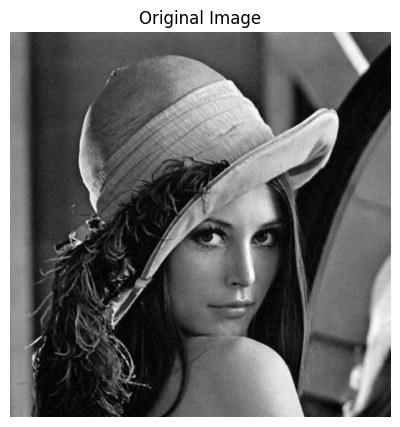

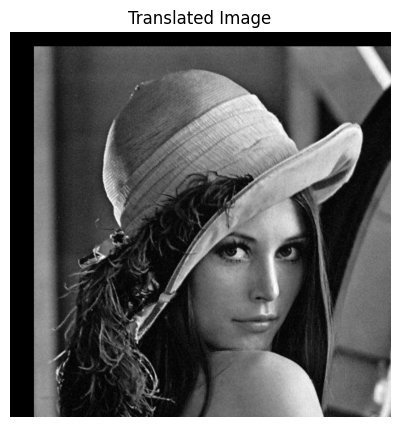

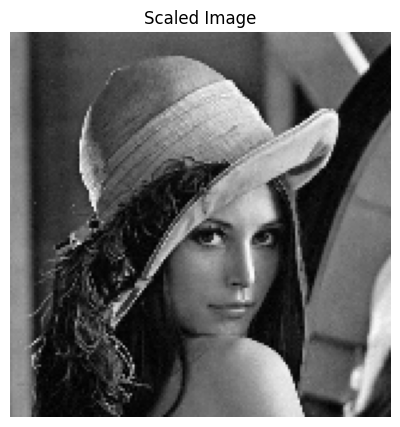

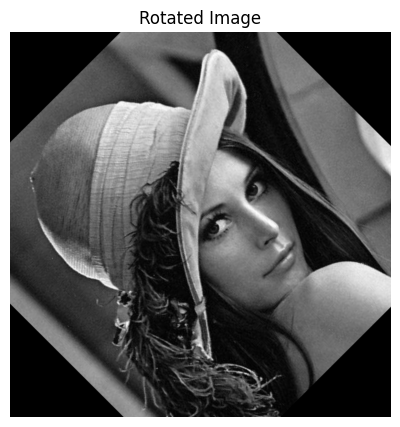

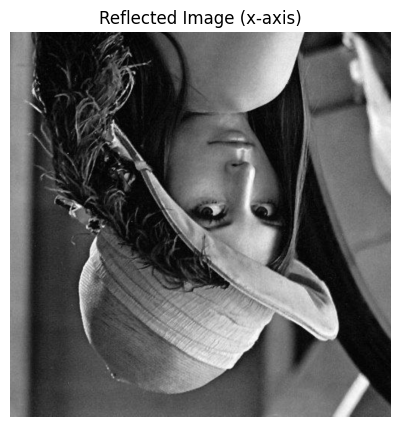

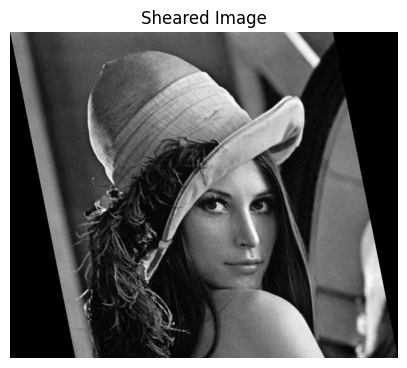

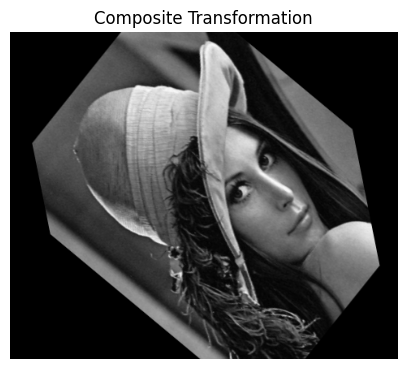

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread(cv2.samples.findFile("a.png"))
if image is None:
    raise Exception("Image not found!")

def plot_image(img, title="Figure", cmap='gray'):
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')

def translate_image(img, tx, ty):
    rows, cols, _ = img.shape
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(img, M, (cols, rows))

def scale_image(img, sx, sy):
    return cv2.resize(img, None, fx=sx, fy=sy, interpolation=cv2.INTER_LINEAR)

def rotate_image(img, angle):
    rows, cols, _ = img.shape
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    return cv2.warpAffine(img, M, (cols, rows))

def reflect_image(img, axis):
    if axis == 'x':
        return cv2.flip(img, 0)
    elif axis == 'y':
        return cv2.flip(img, 1)

def shear_image(img, shx, shy):
    rows, cols, _ = img.shape
    M = np.float32([[1, shx, 0], [shy, 1, 0]])
    n_cols = cols + abs(shx * rows)
    n_rows = rows + abs(shy * cols)
    return cv2.warpAffine(img, M, (int(n_cols), int(n_rows)))

def composite_transform(img):
    # Apply translation
    img = translate_image(img, 50, 30)
    # Apply scaling
    img = scale_image(img, 0.5, 0.5)
    # Apply rotation
    img = rotate_image(img, 45)
    # Apply shearing
    img = shear_image(img, 0.2, 0.0)
    return img

# Plot original image
plot_image(image, "Original Image")

# Apply transformations
translated_img = translate_image(image, 50, 30)
plot_image(translated_img, "Translated Image")

scaled_img = scale_image(image, 0.2, 0.2)
plot_image(scaled_img, "Scaled Image")

rotated_img = rotate_image(image, 45)
plot_image(rotated_img, "Rotated Image")

reflected_img = reflect_image(image, 'x')
plot_image(reflected_img, "Reflected Image (x-axis)")

sheared_img = shear_image(image, 0.2, 0)
plot_image(sheared_img, "Sheared Image")

composite_img = composite_transform(image)
plot_image(composite_img, "Composite Transformation")

plt.show()
